In [41]:
## 想要计算混淆矩阵，要先进行test，这里导出的文件由--out指定

# !python ../tools/test.py \
# ../configs/mel/efficientnet-b0_8xb32_isic2018task3.py \
# ../work_dirs/efficientnet-b0_8xb32_isic2018task3/epoch_55.pth \
# --out efficientnet-b0_result.pkl

In [42]:
import mmcv
from mmcls.datasets import build_dataset
from mmcls.core.evaluation import calculate_confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import torch

In [43]:
cfg = mmcv.Config.fromfile("../configs/mel/efficientnet-b0_8xb32_isic2018task3.py")
dataset = build_dataset(cfg.data.test)

pred = mmcv.load("./efficientnet-b0_result.pkl")['class_scores']

pred = torch.from_numpy(pred)
pred_label = torch.argmax(pred, dim=1).flatten()

target = torch.from_numpy(dataset.get_gt_labels())
target_label = target.flatten()
matrix = calculate_confusion_matrix(pred, dataset.get_gt_labels())
matrix # 由此可以计算指标。



tensor([[122,   1],
        [  6,  15]])

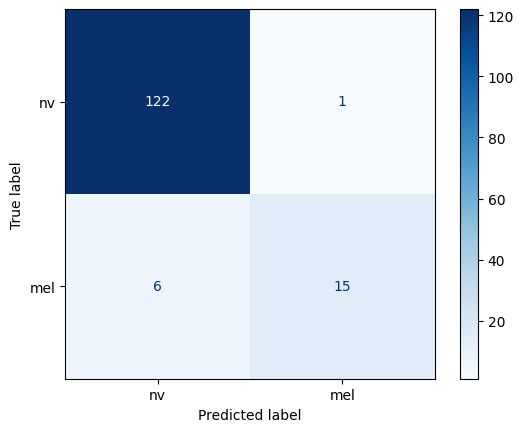

In [44]:
classes = ['nv', 'mel']

# 使用sklearn工具中confusion_matrix方法计算混淆矩阵
confusion_mat = confusion_matrix(target_label, pred_label)

# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classes)
disp.plot(
    include_values=True,            # 混淆矩阵每个单元格上显示具体数值
    cmap="Blues",                   # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax=None,                        # 同上
    xticks_rotation="horizontal",   # 同上
    values_format="d"               # 显示的数值格式
)
plt.show()